# Predicting car price using stats model OLS and sklearn LinearRegression¶

## Case 4 : Using Stats model

### model performance good on both train as well as test set¶

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data',header=0)

In [5]:
features = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']

In [6]:
data.columns = features

In [7]:
data.drop(data.index[data.price=='?'],axis=0,inplace=True)

In [8]:
data.replace('?',np.NaN,inplace=True)

In [9]:
to_float_cols = ['normalized_losses','curb_weight','engine_size','bore','stroke','horsepower','peak_rpm','city_mpg','highway_mpg','price']

In [10]:
for c in to_float_cols:
    data[c] = data[[c]].apply(pd.to_numeric,axis=1,errors='coerce')

In [11]:
data = data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [12]:
data = data.apply(LabelEncoder().fit_transform)

In [13]:
import statsmodels.api as sm

In [14]:
#X = sm.add_constant(data[['normalized_losses','curb_weight','engine_size','bore','stroke','horsepower','peak_rpm','city_mpg','highway_mpg']])
#X = sm.add_constant(data[['curb_weight','horsepower','highway_mpg']])
#X = sm.add_constant(data[['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg']])

After looking into P values from statsmodel

In [15]:

#X = sm.add_constant(data[['make','curb_weight','fuel_system','stroke','compression_ratio','horsepower','city_mpg','highway_mpg']])
#X = sm.add_constant(data[['make','curb_weight','fuel_system','stroke','compression_ratio','horsepower','city_mpg']])
#X = sm.add_constant(data[['make','curb_weight','fuel_system','compression_ratio','horsepower','city_mpg']])
X = sm.add_constant(data[['make','curb_weight','fuel_system','compression_ratio','horsepower']])

In [16]:
y = data.price

In [17]:
lm = sm.OLS(endog=y,exog=X).fit()

In [18]:
lm.params

const               -5.737680
make                -0.996118
curb_weight          0.661658
fuel_system          3.889107
compression_ratio    1.038939
horsepower           1.077842
dtype: float64

In [19]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     325.1
Date:                Sun, 12 Aug 2018   Prob (F-statistic):           3.12e-92
Time:                        02:02:26   Log-Likelihood:                -854.81
No. Observations:                 200   AIC:                             1722.
Df Residuals:                     194   BIC:                             1741.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.7377      4.752     -1.207      0.229     -15.110       3.635
make                 -0.9961      0.215     -4.638      0.000      -1.420      -0.572
curb_weight           0.6617      0.045     14.756      0.000       0.573       0.750
fuel_system           3.8891      0.967      4.022      0.000       1.982       5.796
compression_ratio     1.0389      0.200      5.186      0.000       0.644       1.434
horsepower            1.0778      0.164      6.566      0.000       0.754       1.402
==============================================================================
Omnibus:                        0.107   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.116
Skew:                           0.053   Prob(JB):                        0.944
Kurtosis:                       2.948   Cond. No.                         382.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Evaluating Model Accuracy

In [20]:
round( lm.rsquared, 2 )

0.89

Making Predictions and Calculating RMSE¶

In [21]:
from statsmodels.tools.eval_measures import rmse

In [22]:
lmpredict = lm.predict( X )

In [23]:
rmse( y, lmpredict )

17.3762706405946

Get the residuals and plot them

In [24]:
lm.resid[0:4]

0    14.578161
1   -16.807596
2    12.660457
3    15.772479
dtype: float64

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Satish\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Satish\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


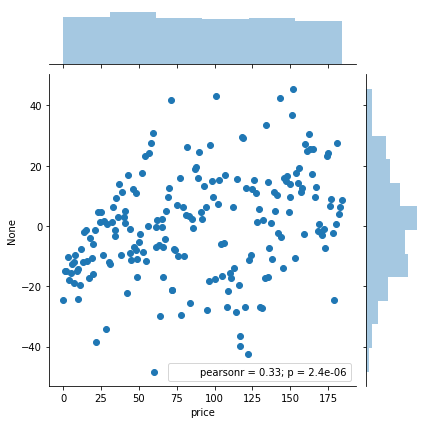

In [26]:
sns.jointplot( y, lm.resid )

The residuals are not randomly distributed. The p-value for the correlation is less than 0.05. So, the correlation estimated is statistically significant

Splitting into Train and Test data sets

In [27]:
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split


C:\Users\Satish\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

Build the model

In [29]:
x_train = sm.add_constant( x_train )
x_test = sm.add_constant( x_test )

In [30]:
lm = sm.OLS( y_train, x_train ).fit()

In [31]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     241.1
Date:                Sun, 12 Aug 2018   Prob (F-statistic):           3.72e-65
Time:                        02:02:42   Log-Likelihood:                -594.08
No. Observations:                 140   AIC:                             1200.
Df Residuals:                     134   BIC:                             1218.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.5278      5.609     -1.342      0.182     -18.622       3.567
make                 -1.0974      0.249     -4.404      0.000      -1.590      -0.605
curb_weight           0.6902      0.052     13.310      0.000       0.588       0.793
fuel_system           3.7506      1.127      3.327      0.001       1.521       5.980
compression_ratio     1.1921      0.230      5.187      0.000       0.738       1.647
horsepower            1.0356      0.195      5.312      0.000       0.650       1.421
==============================================================================
Omnibus:                        0.695   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.706   Jarque-Bera (JB):                0.733
Skew:                           0.165   Prob(JB):                        0.693
Kurtosis:                       2.871   Cond. No.                         385.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
y_trainPredict = lm.predict( x_train )

In [33]:
y_predict = lm.predict( x_test )

In [34]:
rmse( y_trainPredict, y_train )

16.8526876479484

In [35]:
rmse( y_predict, y_test )

18.738681199593877

In [36]:
residuals = y_test - y_predict

Residual Plots

C:\Users\Satish\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Satish\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


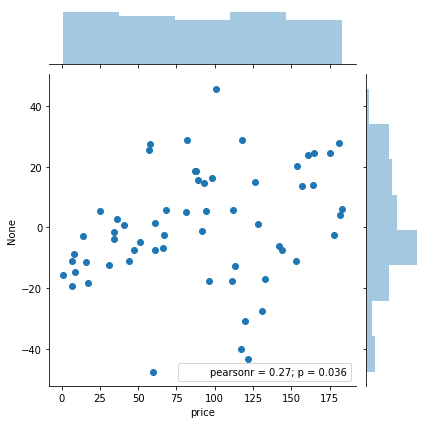

In [37]:
sns.jointplot( y_test, residuals )

The residuals are not randomly distributed. The p-value for the correlation is less than 0.05. So, the correlation estimated is statistically significant

Normality test for residuals

Note: As the null hypothesis is the sample is derived from normal distribution and the p-value is less than 0.05, it is concluded that the residuals are not normally distributed

Check multi-collinearity

VIF (Variance inflation factor) is an indicator of how a predictor is correlated with other predictors. This can be done by taking the predictor in question, and regress it against all of the other predictors in our model.

And the VIF is calculated from r-squared value of the model as 1/(1-R^2)

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
data_mat = X.as_matrix()

C:\Users\Satish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [43]:
data_mat.shape

(200, 6)

In [44]:
vif = [ variance_inflation_factor( data_mat, i ) for i in range( data_mat.shape[1] ) ]

In [45]:
vif_factors = pd.DataFrame()

In [46]:
vif_factors['column'] = X.columns
vif_factors['vif'] = vif

In [47]:
vif_factors

,column,vif
0,const,14.509168
1,make,1.136551
2,curb_weight,3.017794
3,fuel_system,2.425874
4,compression_ratio,1.283776
5,horsepower,3.894260


Note: As the VIF factors is less than 5, there is no multicolliearity between the variables